TRAINING MODEL HERE

Import all necessary modules

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


Upload dataset here

In [2]:
from google.colab import files
uploaded = files.upload()


Saving furniture_dataset.zip to furniture_dataset.zip


Must unzip dataset first

In [15]:
import zipfile
import os

with zipfile.ZipFile("furniture_dataset.zip", "r") as zip_ref:
    zip_ref.extractall("furniture_dataset")

base_dir = "furniture_dataset/furniture_dataset"


Now we load and split data

In [4]:
image_size = (224, 224)
batch_size = 16

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 37 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


Build model using transfer learning

In [5]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 condition classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Train model here

In [6]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2701 - loss: 1.3849 - val_accuracy: 0.3750 - val_loss: 1.7271
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 667ms/step - accuracy: 0.6467 - loss: 0.9343 - val_accuracy: 0.2500 - val_loss: 1.5994
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 564ms/step - accuracy: 0.9261 - loss: 0.5272 - val_accuracy: 0.3750 - val_loss: 1.5041
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 704ms/step - accuracy: 0.8909 - loss: 0.3899 - val_accuracy: 0.3750 - val_loss: 1.4377
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 724ms/step - accuracy: 1.0000 - loss: 0.2538 - val_accuracy: 0.3750 - val_loss: 1.3580
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.1690 - val_accuracy: 0.3750 - val_loss: 1.4250
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.1033 - val_accuracy: 0.3750 - val_loss: 1.4566
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 1.0000 - loss: 0.0779 - val_accuracy: 0.5000 - val_loss: 1.4236


Evaluate Model

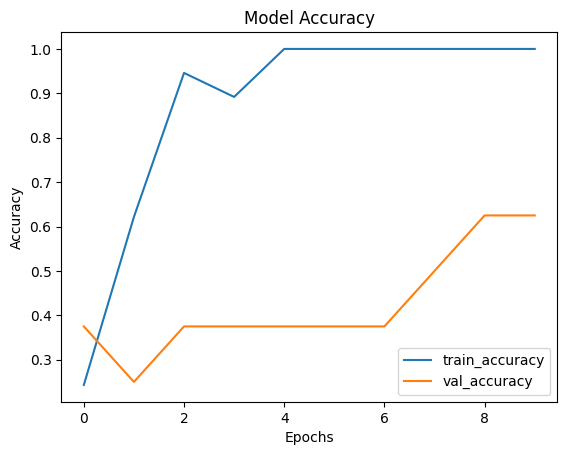

In [7]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


Entire AI Implementation here

Import Modules


In [8]:
from google.colab import files
from tensorflow.keras.preprocessing import image

User upload Furniture Image (Rerun this to try out more pictures in the sample)

In [21]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

Saving s3.jpeg to s3.jpeg


User sets their Brand, Seater, Price

In [22]:
brand = input("Enter the sofa brand (IKEA, HipVan, Scanteak, Others): ").strip().lower()
shape = input("Is it L-shaped? (Yes/No): ").strip().lower()
seater = input("Enter seater type (1, 2, 3, or 4 for 4-seater or more): ").strip()
original_price = float(input("Enter the original sofa price: "))

Enter the sofa brand (IKEA, HipVan, Scanteak, Others): Others
Is it L-shaped? (Yes/No): no
Enter seater type (1, 2, 3, or 4 for 4-seater or more): 2
Enter the original sofa price: 250


Resize Image

In [23]:
img = image.load_img(img_path, target_size=image_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

Predict condition of furniture

In [24]:
prediction = model.predict(img_array)
predicted_class = list(train_gen.class_indices.keys())[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Calculate trade-in value

In [25]:
def estimate_rebate(condition, seater, original_price, brand):
    if condition == "Poor":
        return "This furniture item is not eligible for trade-in due to its condition."

    condition_multiplier = {
        "Fair": 0.15,
        "Good": 0.25,
        "Excellent": 0.40
    }

    seater_bonus = {
        "1": 0.9,
        "2": 1.0,
        "3": 1.1,
        "4": 1.2
    }

    brand_bonus = 1.05 if brand == "hipvan" else 1.0
    l_shape_bonus = 1.1 if shape == "yes" else 1.0

    multiplier = condition_multiplier.get(condition, 0)
    seater_weight = seater_bonus.get(seater, 1.0)

    estimated_rebate = round(original_price * multiplier * seater_weight * brand_bonus * l_shape_bonus, 2)
    return f"${estimated_rebate}"

Output

In [26]:
print(f"Enter sofa brand: {brand}")
print(f"Is it L-shaped: {shape}")
print(f"Enter seater type: {seater}")
print(f"Enter original sofa price: {int(original_price)}")
print(f"Predicted Condition: {predicted_class}")
print(f"Your estimated trade-in voucher value: {estimate_rebate(predicted_class, seater, original_price, brand)}")

Enter sofa brand: others
Is it L-shaped: no
Enter seater type: 2
Enter original sofa price: 250
Predicted Condition: Excellent
Your estimated trade-in voucher value: $100.0
